<a href="https://colab.research.google.com/github/nekotanku/colab/blob/master/Udemy_pytorch_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use("ggplot")

In [4]:
torch.manual_seed(123)

In [5]:
#データ作成
a = 3
b = 2
#view(バッチの次元, 入力データの次元)の順になる
x = torch.linspace(0, 5, 100).view(100, 1)


In [6]:
eps = torch.randn(100, 1)
y = a * x + b + eps

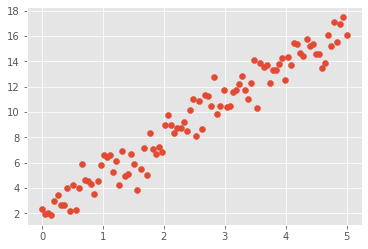

In [7]:
plt.scatter(x, y)

In [8]:
#モデルの定義
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x):
        output = self.linear(x)
        return output

In [9]:
#インスタンス作成
model = LR()

In [13]:
#テストデータで検証
x_test = torch.tensor([[1.0], [2.0]])

In [14]:
model(x_test)

tensor([[-0.6505],
        [-1.4166]], grad_fn=<AddmmBackward>)

In [16]:
x2 = torch.linspace(0, 3, 100).view(100, 1)
x2.size()

torch.Size([100, 1])

In [17]:
y_pred = model(x2)

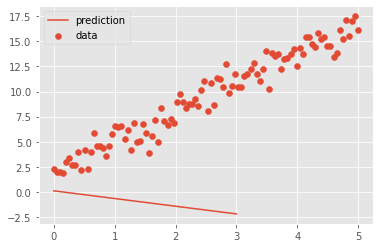

In [18]:
#モデル作成時にネットワークができていて勾配を計算してしまうのでグラフを書くときはdetachで勾配計算しないようにする
plt.plot(x2, y_pred.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()

In [21]:
#損失関数
criterion = nn.MSELoss()
#オプティマイザ
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [24]:
losses = []
num_epoch = 500
for epoch in range(num_epoch):
    optimizer.zero_grad()
    y_pred =model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print("epoch: {}, loss:{}".format(epoch, loss.item()))
        losses.append(loss.item())

epoch: 0, loss:156.7843017578125
epoch: 10, loss:108.74256896972656
epoch: 20, loss:75.52831268310547
epoch: 30, loss:52.56507873535156
epoch: 40, loss:36.68894958496094
epoch: 50, loss:25.712501525878906
epoch: 60, loss:18.12348175048828
epoch: 70, loss:12.876379013061523
epoch: 80, loss:9.248371124267578
epoch: 90, loss:6.7397308349609375
epoch: 100, loss:5.004981517791748
epoch: 110, loss:3.805262804031372
epoch: 120, loss:2.9754462242126465
epoch: 130, loss:2.4013638496398926
epoch: 140, loss:2.0040884017944336
epoch: 150, loss:1.7290520668029785
epoch: 160, loss:1.5385340452194214
epoch: 170, loss:1.406448245048523
epoch: 180, loss:1.3147624731063843
epoch: 190, loss:1.2510122060775757
epoch: 200, loss:1.206579566001892
epoch: 210, loss:1.1755024194717407
epoch: 220, loss:1.1536648273468018
epoch: 230, loss:1.1382170915603638
epoch: 240, loss:1.127191185951233
epoch: 250, loss:1.1192246675491333
epoch: 260, loss:1.1133769750595093
epoch: 270, loss:1.1089967489242554
epoch: 280, lo

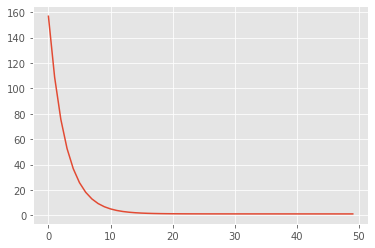

In [25]:
plt.plot(losses)

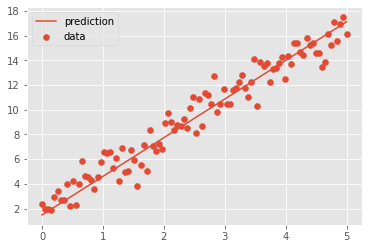

In [26]:
x_test = torch.linspace(0 ,5, 100).view(100, 1)
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()